In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Integration via Monte Carlo

In this example, we will integrate a function using Monte Carlo drawn from random numbers.

The function we will integrate will be $f(x) = 3x^3 -x$ over the range in $x\in [0,1)$.  The integral result is expected to be $F(x) = 3/4 x^4 - 1/2 x^2$ and evaluated over $[0,1)$ yields 1/4.

We will explore the accuracy and precision of the integration over a range of Monte Carlo parameters.  The integral will be performed by randomly sampling the region [0,1) and finding the function's value at that point.  We'll do this `nSamples` times, summing up all of the function values.  By averaging the `nSamples` trials, we will obtain an estimate of the function's integral.

Because this estimator for the integral is a random variable, we will repeat this estimation `nTrials` times to allow for an estimate of the variance and mean for the integral.

In [37]:
# The function
def myFunction(r):
    return 3*pow(r,3) - r

#Declare some useful variables here
nTrials = 20   # number of times to re-run the Monte Carlo integration
nSamples = 50  # number of samples we will obtain for each integration
# we'll report mean and variance over the nTrials
# and calculate them on the fly

In [52]:
def generateTrials(_outcomes, _trials, _samples, _doPrint):
    #run several trials to get a sense for mean and RMS
    mean = 0
    _outcomes = []
    for t in range(0,_trials):
        integral = 0

        #For each trial, use the same number of samples
        for b in range(0,_samples):
            xi = np.random.random()    #Uniform in [0.0,1.0)
            fi = myFunction(xi)/_samples  #Why divide by nSamples?
            integral += fi

        if _doPrint:
            print("Integral ", t, " :  %.5f" % integral)
    
        _outcomes.append(integral)
        mean += integral
  
    mean /= _trials
    if _doPrint:
        print("Mean: %.5f" % mean)
    return _outcomes, mean

def calculateStdDev(_trials, _mean, _doPrint):
    variance = 0
    # Calculate average (x-mu)^2
    for t in range(len(_trials)):
        variance += pow(_trials[t]-_mean,2)

    variance /= len(_trials)
    stdDev = np.sqrt(variance)  #variance is (std dev)^2
    
    if _doPrint:
        print("Std Dev: %.5f" % stdDev)
    return stdDev


In [53]:
trials = []

# Generate one set of integrals
trials, mean = generateTrials(trials, nTrials, nSamples, True)

# Find standard deviation
stdDev = calculateStdDev(trials, mean, True)

Integral  0  :  0.14076
Integral  1  :  0.35912
Integral  2  :  0.22185
Integral  3  :  0.26352
Integral  4  :  0.28982
Integral  5  :  0.32703
Integral  6  :  0.04422
Integral  7  :  0.28583
Integral  8  :  0.30933
Integral  9  :  0.28512
Integral  10  :  0.19573
Integral  11  :  0.09313
Integral  12  :  0.29158
Integral  13  :  0.27678
Integral  14  :  0.23582
Integral  15  :  0.19497
Integral  16  :  0.27002
Integral  17  :  0.37234
Integral  18  :  0.24208
Integral  19  :  0.20893
Mean: 0.24540
Std Dev: 0.08082


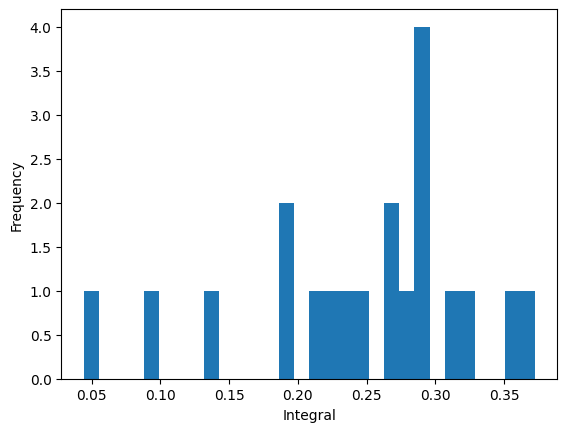

In [54]:
#Make a plot of these integral values!
plt.hist(trials, density=False, bins=30)  # `density=True` would normalize to 1
plt.ylabel('Frequency')
plt.xlabel('Integral');
plt.show()

# Now let's study the mean and variance of the integrals

We can do this as a function of both the number of samples and the number of trials.  

What do you expect to have the biggest impact on the mean?

What about the standard deviation?

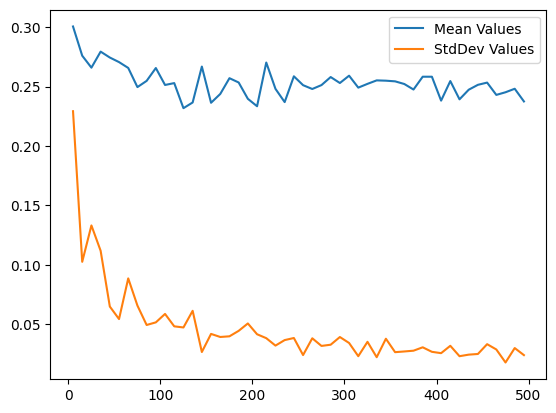

In [68]:
means = []
stdDevs = []
# Scan nSamples for a fixed nTrials value

# First create a sensible range of samples to test
sampleRange = []
for s in range(0,50):
    sampleRange.append(5 + 10*s)

# Now iterate over the range of samples values
for samples in sampleRange:
    trials = []

    # Generate one set of integrals
    trials, _mean = generateTrials(trials, nTrials, samples, False)

    # Find standard deviation
    _stdDev = calculateStdDev(trials, _mean, False)

    means.append(_mean)
    stdDevs.append(_stdDev)

plt.plot(sampleRange, means, label = 'Mean Values')
plt.plot(sampleRange, stdDevs, label = 'StdDev Values')
plt.legend()
plt.show()

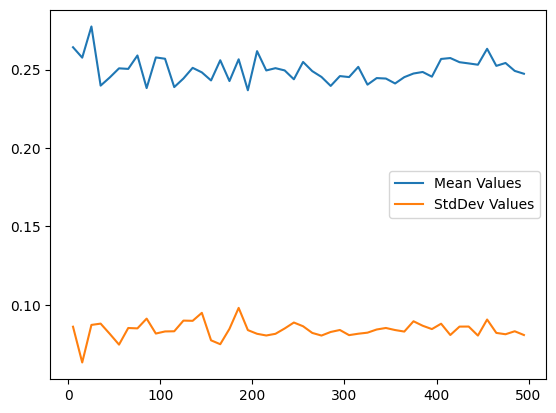

In [69]:
means = []
stdDevs = []
# Scan nSamples for a fixed nTrials value

# First create a sensible range of samples to test
trialRange = []
for t in range(0,50):
    trialRange.append(5 + 10*t)

# Now iterate over the range of samples values
for t in trialRange:
    trials = []

    # Generate one set of integrals
    trials, _mean = generateTrials(trials, t, nSamples, False)

    # Find standard deviation
    _stdDev = calculateStdDev(trials, _mean, False)

    means.append(_mean)
    stdDevs.append(_stdDev)

plt.plot(trialRange, means, label = 'Mean Values')
plt.plot(trialRange, stdDevs, label = 'StdDev Values')
plt.legend()
plt.show()